In [1]:
import os
os.chdir('../../src')
print(os.listdir())

['configs', 'data', 'models', 'train', 'utils', 'evaluate', 'test', 'desktop.ini']


Device: cuda
set seed to 42

--------------------------------------------------

Training fold 3
Horizon definition:  {'in_freq': 240, 'pct_thresh': 0.04, 'lookahead': 10}


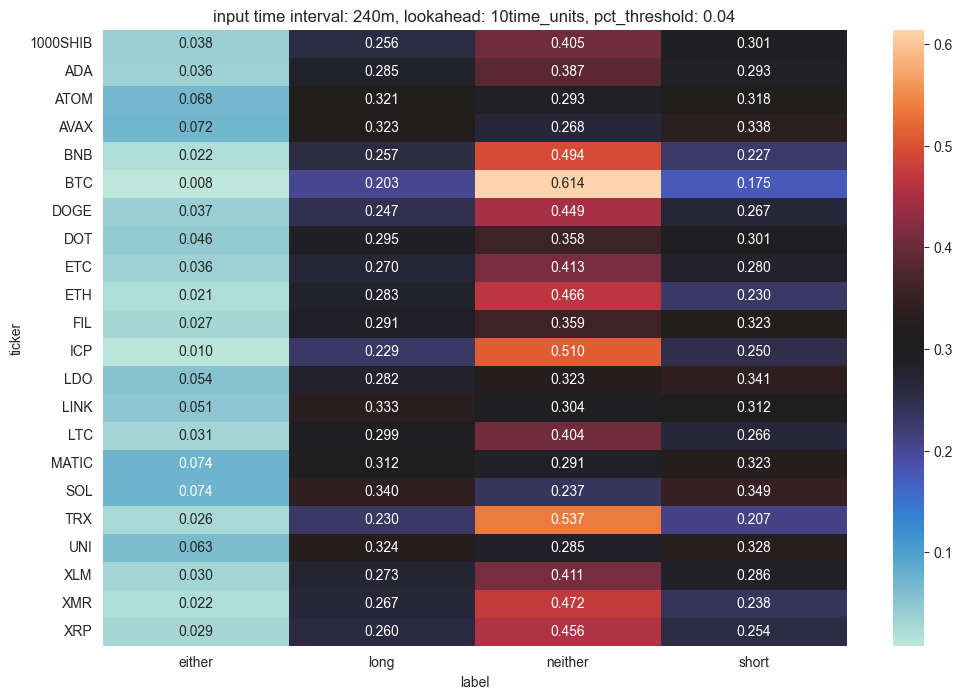

class weights: [0.5990552377029662, 0.7183926169529485, 0.7217971077917147, 0.9607550375523706]
Training with {'train': 4, 'valid': 1, 'test': 4} batches
Baseline:
Validation accuracies by labels:  {0: 0.0, 1: 0.0, 2: 1.0, 3: 0.0}

>>> [2024-01-10 09:59:11.453930 | 0/40 | Early stopping counter 0] 
    loss          - train: 1.386071     valid: 1.403888 
    score         - train: 0.159006     valid: 0.100736 
    learning rate        : 1.00000e-04



Epoch 1 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 142.53it/s, batch_loss=1.158110, epoch_loss=1.212860, learning_rate=0.0001]
Epoch 1 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 147.74it/s, batch_loss=0.879212, epoch_loss=1.244646, learning_rate=0.0001]
Epoch 1 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 143.65it/s, batch_loss=0.452838, epoch_loss=1.197651, learning_rate=0.0001]
Epoch 1 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 144.84it/s, batch_loss=0.976910, epoch_loss=1.032510, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.66573, 1: 0.89514, 2: 0.81113, 3: 0.00253}
>>> [2024-01-10 09:59:58.221541] - Checkpoint and predictions saved

>>> [2024-01-10 09:59:58.221541 | 1/40 | Early stopping counter 0] 
    loss          - train: 0.704863     valid: 0.663742 
    score         - train: 0.716203     valid: 0.739002 
    learning rate        : 1.00000e-04



Epoch 2 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 127.93it/s, batch_loss=0.345519, epoch_loss=0.564041, learning_rate=0.0001]
Epoch 2 | batch 2 / 4: 100%|██████████| 1359/1359 [00:10<00:00, 132.49it/s, batch_loss=1.481071, epoch_loss=0.619627, learning_rate=0.0001]
Epoch 2 | batch 3 / 4: 100%|██████████| 1506/1506 [00:11<00:00, 129.08it/s, batch_loss=0.564471, epoch_loss=0.616499, learning_rate=0.0001]
Epoch 2 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 136.45it/s, batch_loss=0.966591, epoch_loss=0.595056, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.63016, 1: 0.91706, 2: 0.88715, 3: 0.00505}
>>> [2024-01-10 10:00:48.366260] - Checkpoint and predictions saved

>>> [2024-01-10 10:00:48.366260 | 2/40 | Early stopping counter 0] 
    loss          - train: 0.575716     valid: 0.611306 
    score         - train: 0.766260     valid: 0.744760 
    learning rate        : 1.00000e-04



Epoch 3 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 133.53it/s, batch_loss=0.512312, epoch_loss=0.491676, learning_rate=0.0001]
Epoch 3 | batch 2 / 4: 100%|██████████| 1359/1359 [00:10<00:00, 135.00it/s, batch_loss=0.517268, epoch_loss=0.556055, learning_rate=0.0001]
Epoch 3 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 143.40it/s, batch_loss=0.470625, epoch_loss=0.566609, learning_rate=0.0001]
Epoch 3 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 128.62it/s, batch_loss=0.279682, epoch_loss=0.551241, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.6795, 1: 0.89685, 2: 0.90204, 3: 0.02525}
>>> [2024-01-10 10:01:38.336056] - Checkpoint and predictions saved

>>> [2024-01-10 10:01:38.336056 | 3/40 | Early stopping counter 0] 
    loss          - train: 0.539693     valid: 0.584454 
    score         - train: 0.787343     valid: 0.770326 
    learning rate        : 1.00000e-04



Epoch 4 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 137.45it/s, batch_loss=0.269521, epoch_loss=0.462625, learning_rate=0.0001]
Epoch 4 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 143.28it/s, batch_loss=1.197405, epoch_loss=0.526896, learning_rate=0.0001]
Epoch 4 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 138.98it/s, batch_loss=0.511399, epoch_loss=0.539528, learning_rate=0.0001]
Epoch 4 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 136.22it/s, batch_loss=0.645809, epoch_loss=0.526607, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.72393, 1: 0.89457, 2: 0.87598, 3: 0.0303}
>>> [2024-01-10 10:02:26.833584] - Checkpoint and predictions saved

>>> [2024-01-10 10:02:26.833584 | 4/40 | Early stopping counter 0] 
    loss          - train: 0.518044     valid: 0.542381 
    score         - train: 0.798427     valid: 0.785453 
    learning rate        : 1.00000e-04



Epoch 5 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 145.01it/s, batch_loss=0.435523, epoch_loss=0.441276, learning_rate=0.0001]
Epoch 5 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 146.59it/s, batch_loss=0.583608, epoch_loss=0.501540, learning_rate=0.0001]
Epoch 5 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 147.18it/s, batch_loss=0.486826, epoch_loss=0.512839, learning_rate=0.0001]
Epoch 5 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 144.20it/s, batch_loss=0.328549, epoch_loss=0.502277, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.66917, 1: 0.91268, 2: 0.90419, 3: 0.08081}

>>> [2024-01-10 10:03:13.499732 | 5/40 | Early stopping counter 1] 
    loss          - train: 0.485740     valid: 0.551779 
    score         - train: 0.805326     valid: 0.772229 
    learning rate        : 1.00000e-04



Epoch 6 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 148.69it/s, batch_loss=0.197428, epoch_loss=0.422217, learning_rate=0.0001]
Epoch 6 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 149.30it/s, batch_loss=0.261772, epoch_loss=0.474269, learning_rate=0.0001]
Epoch 6 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 140.29it/s, batch_loss=0.534545, epoch_loss=0.478430, learning_rate=0.0001]
Epoch 6 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 151.15it/s, batch_loss=0.168008, epoch_loss=0.466657, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.74249, 1: 0.89342, 2: 0.8605, 3: 0.18182}
>>> [2024-01-10 10:04:00.250845] - Checkpoint and predictions saved

>>> [2024-01-10 10:04:00.250845 | 6/40 | Early stopping counter 0] 
    loss          - train: 0.451809     valid: 0.504492 
    score         - train: 0.825087     valid: 0.798433 
    learning rate        : 1.00000e-04



Epoch 7 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 145.90it/s, batch_loss=0.500849, epoch_loss=0.390165, learning_rate=0.0001]
Epoch 7 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 145.32it/s, batch_loss=0.023048, epoch_loss=0.422905, learning_rate=0.0001]
Epoch 7 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 137.30it/s, batch_loss=0.320664, epoch_loss=0.420450, learning_rate=0.0001]
Epoch 7 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 140.20it/s, batch_loss=0.391579, epoch_loss=0.408733, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.69305, 1: 0.91725, 2: 0.87774, 3: 0.32828}

>>> [2024-01-10 10:04:48.046633 | 7/40 | Early stopping counter 1] 
    loss          - train: 0.400309     valid: 0.504721 
    score         - train: 0.841072     valid: 0.788155 
    learning rate        : 1.00000e-04



Epoch 8 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 152.99it/s, batch_loss=0.339056, epoch_loss=0.344422, learning_rate=0.0001]
Epoch 8 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 142.02it/s, batch_loss=0.161983, epoch_loss=0.362349, learning_rate=0.0001]
Epoch 8 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 149.08it/s, batch_loss=0.278787, epoch_loss=0.358990, learning_rate=0.0001]
Epoch 8 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 134.50it/s, batch_loss=0.490431, epoch_loss=0.349841, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.79464, 1: 0.85567, 2: 0.89303, 3: 0.30303}
>>> [2024-01-10 10:05:36.091868] - Checkpoint and predictions saved

>>> [2024-01-10 10:05:36.091868 | 8/40 | Early stopping counter 0] 
    loss          - train: 0.331379     valid: 0.424969 
    score         - train: 0.870066     valid: 0.823435 
    learning rate        : 1.00000e-04



Epoch 9 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 147.98it/s, batch_loss=0.365737, epoch_loss=0.306985, learning_rate=0.0001]
Epoch 9 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 146.89it/s, batch_loss=0.972269, epoch_loss=0.312923, learning_rate=0.0001]
Epoch 9 | batch 3 / 4: 100%|██████████| 1506/1506 [00:11<00:00, 130.93it/s, batch_loss=0.126498, epoch_loss=0.312262, learning_rate=0.0001]
Epoch 9 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 129.08it/s, batch_loss=0.420035, epoch_loss=0.309384, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.72153, 1: 0.92069, 2: 0.90047, 3: 0.4697}

>>> [2024-01-10 10:06:24.646765 | 9/40 | Early stopping counter 1] 
    loss          - train: 0.293383     valid: 0.441057 
    score         - train: 0.881409     valid: 0.811639 
    learning rate        : 1.00000e-04



Epoch 10 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 138.79it/s, batch_loss=0.130583, epoch_loss=0.290714, learning_rate=0.0001]
Epoch 10 | batch 2 / 4: 100%|██████████| 1359/1359 [00:08<00:00, 157.40it/s, batch_loss=0.031355, epoch_loss=0.285430, learning_rate=0.0001]
Epoch 10 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 139.83it/s, batch_loss=0.790058, epoch_loss=0.285763, learning_rate=0.0001]
Epoch 10 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 140.81it/s, batch_loss=0.117429, epoch_loss=0.285055, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.74906, 1: 0.91459, 2: 0.89714, 3: 0.43939}

>>> [2024-01-10 10:07:11.596216 | 10/40 | Early stopping counter 2] 
    loss          - train: 0.273911     valid: 0.418272 
    score         - train: 0.889942     valid: 0.821500 
    learning rate        : 1.00000e-04



Epoch 11 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 137.77it/s, batch_loss=0.372569, epoch_loss=0.274379, learning_rate=0.0001]
Epoch 11 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 143.55it/s, batch_loss=0.025617, epoch_loss=0.258522, learning_rate=0.0001]
Epoch 11 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 137.93it/s, batch_loss=0.280646, epoch_loss=0.260221, learning_rate=0.0001]
Epoch 11 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 144.91it/s, batch_loss=0.144994, epoch_loss=0.261775, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.79631, 1: 0.89628, 2: 0.89185, 3: 0.40152}
>>> [2024-01-10 10:07:59.245305] - Checkpoint and predictions saved

>>> [2024-01-10 10:07:59.245305 | 11/40 | Early stopping counter 0] 
    loss          - train: 0.267696     valid: 0.400322 
    score         - train: 0.896656     valid: 0.836977 
    learning rate        : 1.00000e-04



Epoch 12 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 135.94it/s, batch_loss=0.321601, epoch_loss=0.259371, learning_rate=0.0001]
Epoch 12 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 140.09it/s, batch_loss=0.053363, epoch_loss=0.238511, learning_rate=0.0001]
Epoch 12 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 146.21it/s, batch_loss=0.231448, epoch_loss=0.241007, learning_rate=0.0001]
Epoch 12 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 142.17it/s, batch_loss=0.220151, epoch_loss=0.242513, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.85763, 1: 0.88046, 2: 0.82837, 3: 0.40909}
>>> [2024-01-10 10:08:47.643935] - Checkpoint and predictions saved

>>> [2024-01-10 10:08:47.643935 | 12/40 | Early stopping counter 0] 
    loss          - train: 0.247941     valid: 0.397147 
    score         - train: 0.905194     valid: 0.846101 
    learning rate        : 1.00000e-04



Epoch 13 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 145.88it/s, batch_loss=0.286030, epoch_loss=0.253943, learning_rate=0.0001]
Epoch 13 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 138.42it/s, batch_loss=0.140394, epoch_loss=0.224419, learning_rate=0.0001]
Epoch 13 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 138.14it/s, batch_loss=0.199554, epoch_loss=0.227271, learning_rate=0.0001]
Epoch 13 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 137.06it/s, batch_loss=0.165240, epoch_loss=0.228949, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.7937, 1: 0.88255, 2: 0.90008, 3: 0.46212}

>>> [2024-01-10 10:09:35.983843 | 13/40 | Early stopping counter 1] 
    loss          - train: 0.233933     valid: 0.405384 
    score         - train: 0.908598     valid: 0.836421 
    learning rate        : 1.00000e-04



Epoch 14 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 146.56it/s, batch_loss=0.152964, epoch_loss=0.239922, learning_rate=0.0001]
Epoch 14 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 148.67it/s, batch_loss=0.039811, epoch_loss=0.207311, learning_rate=0.0001]
Epoch 14 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 148.36it/s, batch_loss=0.395112, epoch_loss=0.209107, learning_rate=0.0001]
Epoch 14 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 149.91it/s, batch_loss=0.273011, epoch_loss=0.212732, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.80121, 1: 0.87569, 2: 0.90223, 3: 0.44192}

>>> [2024-01-10 10:10:21.825915 | 14/40 | Early stopping counter 2] 
    loss          - train: 0.235131     valid: 0.428285 
    score         - train: 0.910909     valid: 0.838208 
    learning rate        : 1.00000e-04



Epoch 15 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 148.46it/s, batch_loss=0.850649, epoch_loss=0.221703, learning_rate=0.0001]
Epoch 15 | batch 2 / 4: 100%|██████████| 1359/1359 [00:08<00:00, 152.70it/s, batch_loss=0.134956, epoch_loss=0.191593, learning_rate=0.0001]
Epoch 15 | batch 3 / 4: 100%|██████████| 1506/1506 [00:09<00:00, 151.29it/s, batch_loss=0.275214, epoch_loss=0.193146, learning_rate=0.0001]
Epoch 15 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 149.27it/s, batch_loss=0.190335, epoch_loss=0.197391, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.81957, 1: 0.88332, 2: 0.8797, 3: 0.47222}

>>> [2024-01-10 10:11:07.208370 | 15/40 | Early stopping counter 3] 
    loss          - train: 0.212773     valid: 0.410566 
    score         - train: 0.921476     valid: 0.843977 
    learning rate        : 1.00000e-05



Epoch 16 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 143.76it/s, batch_loss=0.626511, epoch_loss=0.206956, learning_rate=1e-5]
Epoch 16 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 147.69it/s, batch_loss=0.011097, epoch_loss=0.165831, learning_rate=1e-5]
Epoch 16 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 149.82it/s, batch_loss=0.026157, epoch_loss=0.164641, learning_rate=1e-5]
Epoch 16 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 149.37it/s, batch_loss=0.182716, epoch_loss=0.164672, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.84366, 1: 0.88122, 2: 0.85247, 3: 0.4596}
>>> [2024-01-10 10:11:53.710124] - Checkpoint and predictions saved

>>> [2024-01-10 10:11:53.710124 | 16/40 | Early stopping counter 0] 
    loss          - train: 0.176808     valid: 0.419230 
    score         - train: 0.937072     valid: 0.847567 
    learning rate        : 1.00000e-05



Epoch 17 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 129.94it/s, batch_loss=0.095858, epoch_loss=0.189839, learning_rate=1e-5]
Epoch 17 | batch 2 / 4: 100%|██████████| 1359/1359 [00:10<00:00, 130.21it/s, batch_loss=0.006833, epoch_loss=0.153328, learning_rate=1e-5]
Epoch 17 | batch 3 / 4: 100%|██████████| 1506/1506 [00:11<00:00, 129.28it/s, batch_loss=0.009579, epoch_loss=0.153376, learning_rate=1e-5]
Epoch 17 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 146.77it/s, batch_loss=0.074106, epoch_loss=0.156088, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.83792, 1: 0.87989, 2: 0.86462, 3: 0.46717}
>>> [2024-01-10 10:12:43.015470] - Checkpoint and predictions saved

>>> [2024-01-10 10:12:43.015470 | 17/40 | Early stopping counter 0] 
    loss          - train: 0.172578     valid: 0.425833 
    score         - train: 0.937994     valid: 0.847868 
    learning rate        : 1.00000e-05



Epoch 18 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 145.87it/s, batch_loss=0.068410, epoch_loss=0.185390, learning_rate=1e-5]
Epoch 18 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 146.89it/s, batch_loss=0.027374, epoch_loss=0.149543, learning_rate=1e-5]
Epoch 18 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 141.41it/s, batch_loss=0.105131, epoch_loss=0.149420, learning_rate=1e-5]
Epoch 18 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 141.07it/s, batch_loss=0.529593, epoch_loss=0.152330, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.82958, 1: 0.88351, 2: 0.86991, 3: 0.47222}

>>> [2024-01-10 10:13:30.757070 | 18/40 | Early stopping counter 1] 
    loss          - train: 0.169095     valid: 0.430492 
    score         - train: 0.938673     valid: 0.846318 
    learning rate        : 1.00000e-05



Epoch 19 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 134.69it/s, batch_loss=0.107662, epoch_loss=0.180512, learning_rate=1e-5]
Epoch 19 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 142.75it/s, batch_loss=0.256161, epoch_loss=0.146352, learning_rate=1e-5]
Epoch 19 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 145.93it/s, batch_loss=0.053621, epoch_loss=0.146199, learning_rate=1e-5]
Epoch 19 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 134.83it/s, batch_loss=0.278376, epoch_loss=0.149531, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.82947, 1: 0.88084, 2: 0.87108, 3: 0.49242}

>>> [2024-01-10 10:14:18.590516 | 19/40 | Early stopping counter 2] 
    loss          - train: 0.165716     valid: 0.434877 
    score         - train: 0.939147     valid: 0.846423 
    learning rate        : 1.00000e-05



Epoch 20 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 140.03it/s, batch_loss=0.568734, epoch_loss=0.176735, learning_rate=1e-5]
Epoch 20 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 140.06it/s, batch_loss=0.398485, epoch_loss=0.143432, learning_rate=1e-5]
Epoch 20 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 145.74it/s, batch_loss=0.022058, epoch_loss=0.143214, learning_rate=1e-5]
Epoch 20 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 142.39it/s, batch_loss=0.344575, epoch_loss=0.146950, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.83573, 1: 0.88103, 2: 0.8703, 3: 0.4899}
>>> [2024-01-10 10:15:06.339103] - Checkpoint and predictions saved

>>> [2024-01-10 10:15:06.339103 | 20/40 | Early stopping counter 0] 
    loss          - train: 0.165962     valid: 0.436779 
    score         - train: 0.939775     valid: 0.849194 
    learning rate        : 1.00000e-05



Epoch 21 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 143.25it/s, batch_loss=0.076896, epoch_loss=0.172811, learning_rate=1e-5]
Epoch 21 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 143.54it/s, batch_loss=0.077674, epoch_loss=0.140361, learning_rate=1e-5]
Epoch 21 | batch 3 / 4: 100%|██████████| 1506/1506 [00:11<00:00, 134.45it/s, batch_loss=0.105704, epoch_loss=0.140087, learning_rate=1e-5]
Epoch 21 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 138.08it/s, batch_loss=0.067734, epoch_loss=0.144050, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.83458, 1: 0.87874, 2: 0.8701, 3: 0.4899}

>>> [2024-01-10 10:15:54.870453 | 21/40 | Early stopping counter 1] 
    loss          - train: 0.164058     valid: 0.443302 
    score         - train: 0.940394     valid: 0.848038 
    learning rate        : 1.00000e-05



Epoch 22 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 146.16it/s, batch_loss=0.098565, epoch_loss=0.171682, learning_rate=1e-5]
Epoch 22 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 146.10it/s, batch_loss=0.000665, epoch_loss=0.138221, learning_rate=1e-5]
Epoch 22 | batch 3 / 4: 100%|██████████| 1506/1506 [00:09<00:00, 154.42it/s, batch_loss=0.460189, epoch_loss=0.138022, learning_rate=1e-5]
Epoch 22 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 145.08it/s, batch_loss=0.085910, epoch_loss=0.141747, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.84105, 1: 0.87531, 2: 0.86246, 3: 0.4697}

>>> [2024-01-10 10:16:40.620149 | 22/40 | Early stopping counter 2] 
    loss          - train: 0.160232     valid: 0.451376 
    score         - train: 0.942883     valid: 0.847696 
    learning rate        : 1.00000e-05



Epoch 23 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 143.29it/s, batch_loss=0.028640, epoch_loss=0.167470, learning_rate=1e-5]
Epoch 23 | batch 2 / 4: 100%|██████████| 1359/1359 [00:08<00:00, 155.33it/s, batch_loss=0.013247, epoch_loss=0.135354, learning_rate=1e-5]
Epoch 23 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 145.49it/s, batch_loss=0.116527, epoch_loss=0.135212, learning_rate=1e-5]
Epoch 23 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 145.34it/s, batch_loss=0.371046, epoch_loss=0.139411, learning_rate=1e-5]


Validation accuracies by labels:  {0: 0.84011, 1: 0.86959, 2: 0.86912, 3: 0.47727}

>>> [2024-01-10 10:17:26.817725 | 23/40 | Early stopping counter 3] 
    loss          - train: 0.157967     valid: 0.454501 
    score         - train: 0.943498     valid: 0.847705 
    learning rate        : 1.00000e-06



Epoch 24 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 152.87it/s, batch_loss=0.026697, epoch_loss=0.179784, learning_rate=1e-6]
Epoch 24 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 148.51it/s, batch_loss=0.102597, epoch_loss=0.139797, learning_rate=1e-6]
Epoch 24 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 142.51it/s, batch_loss=0.020651, epoch_loss=0.137407, learning_rate=1e-6]
Epoch 24 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 129.63it/s, batch_loss=0.021094, epoch_loss=0.139044, learning_rate=1e-6]


Validation accuracies by labels:  {0: 0.81811, 1: 0.89228, 2: 0.87441, 3: 0.49747}

>>> [2024-01-10 10:18:14.171869 | 24/40 | Early stopping counter 4] 
    loss          - train: 0.145858     valid: 0.456270 
    score         - train: 0.947711     valid: 0.844903 
    learning rate        : 1.00000e-06



Epoch 25 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 128.63it/s, batch_loss=0.092783, epoch_loss=0.170661, learning_rate=1e-6]
Epoch 25 | batch 2 / 4: 100%|██████████| 1359/1359 [00:10<00:00, 131.71it/s, batch_loss=0.027110, epoch_loss=0.135707, learning_rate=1e-6]
Epoch 25 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 150.50it/s, batch_loss=0.102050, epoch_loss=0.134295, learning_rate=1e-6]
Epoch 25 | batch 4 / 4: 100%|██████████| 1519/1519 [00:11<00:00, 137.01it/s, batch_loss=0.116733, epoch_loss=0.137015, learning_rate=1e-6]


Validation accuracies by labels:  {0: 0.82092, 1: 0.88999, 2: 0.87402, 3: 0.49242}

>>> [2024-01-10 10:19:02.514770 | 25/40 | Early stopping counter 5] 
    loss          - train: 0.144331     valid: 0.457287 
    score         - train: 0.948609     valid: 0.845433 
    learning rate        : 1.00000e-06



Epoch 26 | batch 1 / 4: 100%|██████████| 834/834 [00:06<00:00, 137.75it/s, batch_loss=0.070499, epoch_loss=0.167542, learning_rate=1e-6]
Epoch 26 | batch 2 / 4: 100%|██████████| 1359/1359 [00:10<00:00, 129.47it/s, batch_loss=0.001256, epoch_loss=0.134895, learning_rate=1e-6]
Epoch 26 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 142.06it/s, batch_loss=0.141419, epoch_loss=0.133447, learning_rate=1e-6]
Epoch 26 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 141.06it/s, batch_loss=0.147479, epoch_loss=0.136504, learning_rate=1e-6]


Validation accuracies by labels:  {0: 0.81852, 1: 0.88999, 2: 0.875, 3: 0.49747}

>>> [2024-01-10 10:19:52.084512 | 26/40 | Early stopping counter 6] 
    loss          - train: 0.144062     valid: 0.458271 
    score         - train: 0.948941     valid: 0.844680 
    learning rate        : 1.00000e-07



Epoch 27 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 141.05it/s, batch_loss=0.006338, epoch_loss=0.175928, learning_rate=1e-7]
Epoch 27 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 142.04it/s, batch_loss=0.452781, epoch_loss=0.137907, learning_rate=1e-7]
Epoch 27 | batch 3 / 4: 100%|██████████| 1506/1506 [00:11<00:00, 135.45it/s, batch_loss=0.266628, epoch_loss=0.136414, learning_rate=1e-7]
Epoch 27 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 140.12it/s, batch_loss=0.033641, epoch_loss=0.138052, learning_rate=1e-7]


Validation accuracies by labels:  {0: 0.81383, 1: 0.89704, 2: 0.87128, 3: 0.49242}

>>> [2024-01-10 10:20:40.542052 | 27/40 | Early stopping counter 7] 
    loss          - train: 0.140632     valid: 0.462376 
    score         - train: 0.950090     valid: 0.843160 
    learning rate        : 1.00000e-07



Epoch 28 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 142.46it/s, batch_loss=0.162171, epoch_loss=0.170277, learning_rate=1e-7]
Epoch 28 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 141.05it/s, batch_loss=0.021169, epoch_loss=0.135696, learning_rate=1e-7]
Epoch 28 | batch 3 / 4: 100%|██████████| 1506/1506 [00:09<00:00, 154.96it/s, batch_loss=0.289052, epoch_loss=0.134442, learning_rate=1e-7]
Epoch 28 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 138.29it/s, batch_loss=0.076437, epoch_loss=0.136885, learning_rate=1e-7]


Validation accuracies by labels:  {0: 0.81154, 1: 0.90029, 2: 0.87089, 3: 0.49495}

>>> [2024-01-10 10:21:27.648737 | 28/40 | Early stopping counter 8] 
    loss          - train: 0.140076     valid: 0.464598 
    score         - train: 0.950042     valid: 0.842838 
    learning rate        : 1.00000e-07



Epoch 29 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 151.58it/s, batch_loss=0.540333, epoch_loss=0.169284, learning_rate=1e-7]
Epoch 29 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 142.03it/s, batch_loss=0.027523, epoch_loss=0.135623, learning_rate=1e-7]
Epoch 29 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 146.46it/s, batch_loss=0.205150, epoch_loss=0.134112, learning_rate=1e-7]
Epoch 29 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 147.45it/s, batch_loss=0.077317, epoch_loss=0.136741, learning_rate=1e-7]


Validation accuracies by labels:  {0: 0.81049, 1: 0.90105, 2: 0.87089, 3: 0.49242}

>>> [2024-01-10 10:22:14.048993 | 29/40 | Early stopping counter 9] 
    loss          - train: 0.139810     valid: 0.465442 
    score         - train: 0.950090     valid: 0.842473 
    learning rate        : 1.00000e-08



Epoch 30 | batch 1 / 4: 100%|██████████| 834/834 [00:05<00:00, 153.85it/s, batch_loss=0.485935, epoch_loss=0.169380, learning_rate=1e-8]
Epoch 30 | batch 2 / 4: 100%|██████████| 1359/1359 [00:09<00:00, 146.86it/s, batch_loss=0.104565, epoch_loss=0.135908, learning_rate=1e-8]
Epoch 30 | batch 3 / 4: 100%|██████████| 1506/1506 [00:10<00:00, 149.06it/s, batch_loss=0.005756, epoch_loss=0.134193, learning_rate=1e-8]
Epoch 30 | batch 4 / 4: 100%|██████████| 1519/1519 [00:10<00:00, 150.61it/s, batch_loss=0.110187, epoch_loss=0.136681, learning_rate=1e-8]


Validation accuracies by labels:  {0: 0.81008, 1: 0.90105, 2: 0.87089, 3: 0.49242}

>>> [2024-01-10 10:22:59.998433 | 30/40 | Early stopping counter 10] 
    loss          - train: 0.139614     valid: 0.465651 
    score         - train: 0.950125     valid: 0.842271 
    learning rate        : 1.00000e-08



In [2]:
from configs.config import Config, INPUT_FREQ, PCT_THRESHOLDS, HORIZONS
from train.train import train_model

# fold is fixed to 3
seed = 42 
for pct_thresh in PCT_THRESHOLDS:
    for lookahead in [2, 4, 6, 8, 10]:
        for in_freq in [30, 60, 120, 180, 240]:
            
            config = Config()
            config.data_dir = '../data'
            config.models_dir = '../models'
            config.horizon_def = {
                'in_freq' : in_freq,
                'pct_thresh': pct_thresh / 100.,
                'lookahead': lookahead
            }
            config.prep_data_path = "E:\data"
            config.max_len = 128
            config.fold = 3
            config.model_name = f'hslstm/in_freq{in_freq}m-lookahead{lookahead}-pct_thresh{pct_thresh}-seed{seed}'
            config.train_with_external_drive = False
            config.learning_rate = 1e-4
            config.lr_multiplier = 0.1
            config.lr_patience = 2
            config.num_epochs = 40
            config.sample_run = False
            if not os.path.exists(f'{config.models_dir}/{config.model_name}'):
                config.apply_seed(seed = seed)
                results = train_model(config = config)